In [1]:
# packages
import math
import numpy as np

In [2]:
# Distance calculation, degree to km (Haversine method)
def harvesine(lon1, lat1, lon2, lat2):
    rad = math.pi / 180  # degree to radian
    R = 6378.1  # earth average radius at equador (km)
    dlon = (lon2 - lon1) * rad
    dlat = (lat2 - lat1) * rad
    a = (math.sin(dlat / 2)) ** 2 + math.cos(lat1 * rad) * \
        math.cos(lat2 * rad) * (math.sin(dlon / 2)) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return(d)

In [3]:
# Prediction
def idwr(x, y, z, xi, yi):
    lstxyzi = []
    for p in range(len(xi)):
        lstdist = []
        for s in range(len(x)):
            d = (harvesine(x[s], y[s], xi[p], yi[p]))
            lstdist.append(d)
        sumsup = list((1 / np.power(lstdist, 2)))
        suminf = np.sum(sumsup)
        sumsup = np.sum(np.array(sumsup) * np.array(z))
        u = sumsup / suminf
        xyzi = [xi[p], yi[p], u]
        lstxyzi.append(xyzi)
    return(lstxyzi)

In [4]:
# know points
x = [-47.6, -48.9, -48.2, -48.9, -47.6, -48.6]
y = [-23.4, -24.0, -23.9, -23.1, -22.7, -22.5]
z = [27.0,  33.4,  34.6,  18.2,   30.8, 42.8]
# unknow point
xi = [-48.0530600]
yi = [-23.5916700]
# running the function
idwr(x,y,z,xi,yi)

[[-48.05306, -23.59167, 31.486682779040855]]

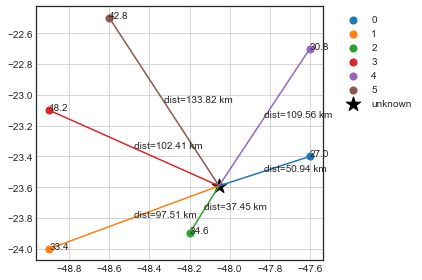

In [5]:
#plotting results
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
style.use('seaborn-white')
dists = [50.93664088924365, 97.50798854810864, 37.44644402279387, 102.4130216426453, 109.55825855482198, 133.81580425549404]
len(dists)
for i in range(len(x)):
    plt.scatter(x = x[i],
                y = y[i],
                label= i,
                s = 50)
    plt.annotate(xy = (x[i],y[i]),      
                 text=z[i])
    plt.annotate(xy = ( ((x[i] + xi[0]) / 2), ((y[i] + yi[0]) / 2)),      
                 text= 'dist='+ str(np.round(dists[i],2))+ ' km')
    lcx = [xi[0], x[i]]
    lcy = [yi[0], y[i]]
    plt.plot(lcx,lcy)    
plt.scatter(xi,yi,
            c='black', s=230, label='unknown', marker='*')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.show()